In [1]:
import matplotlib.pyplot as plt
from zoology.analysis.utils import fetch_wandb_runs

In [2]:
df = fetch_wandb_runs("geometric-meta-learning/zoology", {"tags": {"$in": ["fig2-sweep"]}})

In [3]:
by_state_size = df.groupby(["model.name", "state_size"])["valid/accuracy"].max()
by_state_size

model.name  state_size
attention   525056        0.999964
            1050112       0.999964
linattn     17152         0.619558
            67072         0.839687
            265216        0.976392
            1054720       0.992328
timeswiglu  49920         0.499031
            198144        0.719728
            789504        0.923412
            3151872       0.967948
Name: valid/accuracy, dtype: float64

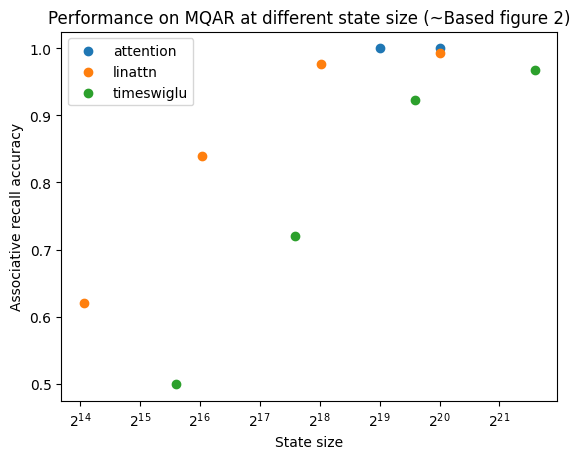

In [4]:
# plot the above as a scatter plot with state_size on x axis and accuracy on y axis
fig, ax = plt.subplots()
for model_name in by_state_size.index.levels[0]:
    ax.scatter(by_state_size[model_name].index, by_state_size[model_name].values, label=model_name)
# log scale base 2 x axis
ax.set_xscale('log', base=2)
# set title
ax.set_title("Performance on MQAR at different state size (~Based figure 2)")
ax.set_xlabel("State size")
ax.set_ylabel("Associative recall accuracy")
plt.legend()

In [26]:
# Causal linattn is clearly better
df.groupby(["model.name", "model.d_model", "model.sequence_mixer.kwargs.configs.1.kwargs.causal"])["valid/accuracy"].max()

model.name  model.d_model  model.sequence_mixer.kwargs.configs.1.kwargs.causal
linattn     64             False                                                  0.506958
                           True                                                   0.619558
            128            False                                                  0.737982
                           True                                                   0.839687
Name: valid/accuracy, dtype: float64